# MNIST Data Preprocessing
1. **Loads MNIST dataset:**
    - `(x_train, y_train), (x_test, y_test) = mnist.load_data()`
2. **Prepares training data:**
    - Reshapes first 60000 images: `images = x_train[0:60000].reshape(60000, 28*28) / 255`
    - One-hot encodes labels: `labels = np.zeros((len(labels), 10)); ...`
3. **Prepares test data:**
    - Reshapes and normalizes all test images: `test_images_all = x_test.reshape(len(x_test), 28*28) / 255`
    - One-hot encodes test labels: `test_labels_all = np.zeros((len(y_test), 10)); ...`
    - Selects first 6000 test images and labels: `test_images, test_labels = test_images_all[0:6000], test_labels_all[0:6000]`



In [100]:
import sys, numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
# Preparing the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
images, labels = (x_train[0:60000].reshape(60000,28*28) / 255, y_train[0:60000])
one_hot_labels = np.zeros((len(labels), 10))
for i, l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images_all = x_test.reshape(len(x_test), 28*28) / 255
test_labels_all = np.zeros((len(y_test), 10))
for i, l in enumerate(y_test):
    test_labels_all[i][l] = 1
test_images = test_images_all[0:6000]
test_labels = test_labels_all[0:6000]

In [101]:
print(f'The shape of Training images: {images.shape}')
print(f'The shape of Training labels: {labels.shape}')
print(f'The shape of test images: {test_images.shape}')
print(f'The shape of test labels: {test_labels.shape}')

The shape of Training images: (60000, 784)
The shape of Training labels: (60000, 10)
The shape of test images: (6000, 784)
The shape of test labels: (6000, 10)


# Model Initialization

- **Layer Definitions:**
    - `HIDDEN_LAYER_SIZE = 100`: Number of neurons in the hidden layer.
    - `OUTPUT_LAYER_SIZE = 10`: Number of neurons in the output layer (matching 10 digits in MNIST).
    - `INPUT_LAYER_SIZE = images.shape[1]`: Number of input features (784 pixels for MNIST images).
- **Model Weights and Biases:**
    - `W1`: Weights connecting input layer to hidden layer (784x100 matrix).
    - `b1`: Biases for hidden layer neurons (1x100 vector).
    - `W2`: Weights connecting hidden layer to output layer (100x10 matrix).
    - `b2`: Biases for output layer neurons (1x10 vector).
- **Random Initialization:**
    - Weights are initialized with small random values between -1 and 1 for better learning.
    - Biases are initialized to zero.

**Purpose:**

- Creates a basic neural network model with one hidden layer, ready for training on the prepared MNIST data.
```**


In [102]:
HIDDEN_LAYER_SIZE = 100
OUTPUT_LAYER_SIZE = 10
INPUT_LAYER_SIZE = images.shape[1]
model = {
    'W1': 2 * np.random.random((INPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE)) - 1, # 784 x HIDDEN_LAYER_SIZE
    'b1': np.zeros((1, HIDDEN_LAYER_SIZE)), # 1 x HIDDEN_LAYER_SIZE
    'W2': 2 * np.random.random((HIDDEN_LAYER_SIZE, OUTPUT_LAYER_SIZE)) - 1, # HIDDEN_LAYER_SIZE x OUTPUT_LAYER_SIZE
    'b2': np.zeros((1, OUTPUT_LAYER_SIZE)) # 1 x OUTPUT_LAYER_SIZE
}


# Activation Functions

**Defined Functions:**

- **`sigmoid(x)`:**
    - S-shaped curve that maps input values between 0 and 1.
    - Commonly used in output layers for binary classification.
    - `np.clip(x, -50, 50)` prevents numerical overflow.
- **`sigmoid_derivative(x)`:**
    - Calculates the derivative of the sigmoid function, used for backpropagation.
- **`relu(x)`:**
    - Rectified Linear Unit, outputs 0 for negative inputs and the input value itself for positive inputs.
    - Promotes sparsity and helps prevent vanishing gradients.
- **`relu2deriv(output)`:**
    - Derivative of ReLU, used for backpropagation.

**Purpose:**

- These functions introduce non-linearity into neural networks, enabling them to learn complex patterns and decision boundaries.
- They are essential for the training process, as they determine how neurons transform their inputs into outputs and how errors are propagated back to adjust weights and biases.
```**


In [103]:
def sigmoid(x):
    x = np.clip(x, -50, 50)
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return (x > 0) * x
def relu2deriv(output):
    return output > 0

 **exponentially weighted averages (EWMAs) (The way how we looking at the last grdients):**

**What they are:**

- A way to calculate an average that gives more weight to recent data points, making it especially useful for tracking trends in time-series data.
- It achieves this by assigning decreasing weights to older data points in an exponential manner—like an echo that gradually fades away.

**How they work:**

1. **Choose a weighting parameter (β):** This value, between 0 and 1, determines how quickly the weights decline. Higher β values place more emphasis on recent data.
2. **Initialize the EWMA:** Start with the first data point as the initial EWMA value.
3. **Calculate the EWMA for each subsequent data point:**
   - Use the formula: `EWMA_t = β * EWMA_(t-1) + (1 - β) * x_t`
      - `EWMA_t` is the EWMA at time t
      - `EWMA_(t-1)` is the previous EWMA value
      - `x_t` is the current data point
4. **Update iteratively:** The EWMA value is updated with each new data point, creating a smooth, responsive average that reflects the most recent trends.

In [104]:
# Data to be smoothed (e.g., a stock's price over time)
data = np.array([10, 12, 15, 13, 18, 16, 20, 14, 10, 16])

# Parameter controlling the weight given to recent data (between 0 and 1)
beta = 0.9

# Initialize the first value of the EWMA
t_1 = data[0] # 10

# Calculate the EWMA for each subsequent data point
for value in data[1:]:
    print(f'New input from the data is: {value} and the EMWA new value is {t_1}')
    t_1 = beta * t_1 + (1 - beta) * value 

print("Exponentially Weighted Average:", t_1)

New input from the data is: 12 and the EMWA new value is 10
New input from the data is: 15 and the EMWA new value is 10.2
New input from the data is: 13 and the EMWA new value is 10.68
New input from the data is: 18 and the EMWA new value is 10.911999999999999
New input from the data is: 16 and the EMWA new value is 11.6208
New input from the data is: 20 and the EMWA new value is 12.05872
New input from the data is: 14 and the EMWA new value is 12.852848
New input from the data is: 10 and the EMWA new value is 12.9675632
New input from the data is: 16 and the EMWA new value is 12.67080688
Exponentially Weighted Average: 13.003726192


## Gradient Descent with Momentum

In essence, gradient descent with momentum (GDM) builds upon basic gradient descent by **accumulating past gradients** to create a moving average. This average informs the weight updates, leading to smoother progress during optimization. Here's the technical breakdown:

**1. Initializing Momentum Terms:**

- For each parameter (weight, bias) in the model, we create a corresponding **momentum term (velocity)** initialized to zero.

**2. Gradient Calculation:**

- Each iteration follows the same process as vanilla gradient descent:
    - Forward pass to predict outputs.
    - Calculate the loss/error between predictions and actual values.
    - Backpropagate to compute the gradients (partial derivatives of the loss) for each parameter.

**3. Update Momentum Terms:**

- This is where GDM diverges:
    - We combine the current gradient with the previous momentum term using a **momentum coefficient (β)**, typically between 0.5 and 0.9.
    - The momentum term effectively becomes a **weighted average** of past gradients, giving more weight to recent ones.

**4. Update Weights:**

- Instead of directly using the current gradient, we use the updated momentum term:
    - We subtract the scaled momentum term from the current parameters (weights, biases) to adjust them in the direction of the accumulated gradient.

**5. Repeat and Refine:**

- This process iterates for the desired number of epochs (training passes).
- The momentum term accumulates information across past gradients, guiding the updates and contributing to:
    - **Smoother optimization:** Dampens oscillations and avoids getting stuck in shallow minima.
    - **Faster convergence:** Reaches the optimal solution quicker, especially with steep slopes or noisy gradients.
    - **Increased robustness:** Improves stability and reduces sensitivity to parameter initialization.

**Technical Details:**

- The momentum coefficient (β) controls the influence of past gradients. Higher β increases memory of past gradients but may overshoot the optimum.
- GDM can be seen as a first-order filter on the gradient, smoothing out fluctuations.
- Compared to vanilla gradient descent, GDM often requires fewer learning rate adjustments due to its inherently smoother updates.

**Impact on Learning:**

By incorporating past gradient information, GDM facilitates efficient exploration of the error surface, leading to improved learning:

- **Reduced sensitivity to local minima:** Accumulated momentum can help escape shallow valleys and find broader minima.
- **Improved generalization:** Smoother updates lead to more stable parameter values, potentially enhancing generalization on unseen data.

**In conclusion, GDM provides a robust and efficient alternative to vanilla gradient descent, making it a popular choice for optimizing various models, including neural networks.**



 **Explaination of the `train_mnist` function:**

**1. Function Purpose:**
- Trains a neural network model on the MNIST dataset using mini-batch gradient descent.

**2. Parameters:**
- `images`: Input images (array of shape `(num_samples, 784)`).
- `labels`: True labels (array of shape `(num_samples, OUTPUT_LAYER_SIZE)`).
- `model`: Dictionary containing model weights and biases.
- `lr`: Learning rate (default: 0.01).
- `momentum`: The momentum coefficient (typically between 0.5 and 0.9) controls how much influence previous gradients have on the current update (default: 0.9).
- `decay_rate`: Learning rate decay rate (default: 0.95).
- `mini_batch_size`: Size of mini-batches (default: 128).

**3. Steps:**

1. **Mini-Batch Loop:**
   - Iterates through the dataset in mini-batches.
2. **Extract Mini-Batch:**
   - Gets a subset of images and labels for the current mini-batch.
3. **Forward Pass:**
   - Calculates outputs for the mini-batch using the model.
   - Applies ReLU in the hidden layer and sigmoid in the output layer.
4. **Calculate Error:**
   - Computes the difference between predicted outputs and true labels.
5. **Backpropagation:**
   - Calculates error gradients for the output and hidden layers.
   - Uses derivatives of ReLU and sigmoid functions.
6. **Weights Update:**
   - Calculating the Velocity of each weight and biases with respect to the gradient
   - Adjusts model weights and biases based on the gradients and velocity.
7. **Learning Rate Decay:**
   - Decreases the learning rate after each mini-batch to aid convergence.
8. **Return Updated Model:**
   - Returns the model with updated weights and biases.


In [105]:
def train_mnist(images, labels, model, lr=0.01, momentum=0.9, decay_rate=0.95, mini_batch_size=128):
    num_samples = len(images)
    vW1 = np.zeros_like(model['W1']) # Velocity of W1
    vb1 = np.zeros_like(model['b1']) # Velocity of b1
    vW2 = np.zeros_like(model['W2']) # Velocity of W2
    vb2 = np.zeros_like(model['b2']) # Velocity of b2
        
    for i in range(0, num_samples, mini_batch_size):
        # Extract mini-batch
        batch_images = images[i:i+mini_batch_size] 
        batch_labels = labels[i:i+mini_batch_size] 
        
        # Forward pass
        hidden_layer = relu(batch_images.dot(model['W1']) + model['b1']) # BATCHSIZE x 784 * 784 x HIDDEN_LAYER_SIZE = BATCHSIZE x HIDDEN_LAYER_SIZE
        output_layer = sigmoid(hidden_layer.dot(model['W2']) + model['b2']) # BATCHSIZE x HIDDEN_LAYER_SIZE * HIDDEN_LAYER_SIZE x OUTPUT_LAYER_SIZE = BATCHSIZE x OUTPUT_LAYER_SIZE

        # Calculate the error/loss
        error = output_layer - batch_labels # BATCHSIZE x OUTPUT_LAYER_SIZE # calculates the pure error, or loss, which is used for computing derivatives in backpropagation

        # Backpropagation
        output_layer_delta = error * sigmoid_derivative(output_layer) # BATCHSIZE x OUTPUT_LAYER_SIZE
        hidden_layer_delta = output_layer_delta.dot(model['W2'].T) * relu2deriv(hidden_layer) # BATCHSIZE x OUTPUT_LAYER_SIZE * OUTPUT_LAYER_SIZE x HIDDEN_LAYER_SIZE = BATCHSIZE x HIDDEN_LAYER_SIZE

        # Weights Update
        vW2 = momentum * vW2 + (1 - beta) * hidden_layer.T.dot(output_layer_delta) # HIDDEN_LAYER_SIZE x OUTPUT_LAYER_SIZE
        model['W2'] -= lr * vW2 
        vW1 = momentum * vW1 + (1 - beta) * batch_images.T.dot(hidden_layer_delta) # INPUT_LAYER_SIZE x HIDDEN_LAYER_SIZE
        model['W1'] -= lr * vW1 

        vb2 = momentum * vb2 + (1 - beta) * np.mean(output_layer_delta)
        model['b2'] -= lr * vb2 # 1 x HIDDEN_LAYER_SIZE
        vb1 = momentum * vb1 + (1 - beta) * np.mean(hidden_layer_delta)
        model['b1'] -= lr * vb1 # 1 x OUTPUT_LAYER_SIZE

    # Learning rate decay
    lr *= decay_rate

    return model


 **Implementation of the prediction and evaluation function**

**1. `model_prediction(model, X)`:**

- **Purpose:** Generates predictions for given inputs using the model.
- **Steps:**
    1. **Calculate hidden layer outputs:** Applies ReLU activation to the weighted sum of inputs and hidden layer weights (`model['W1']`) plus biases (`model['b1']`).
    2. **Calculate output layer outputs:** Applies sigmoid activation to the weighted sum of hidden layer outputs and output layer weights (`model['W2']`) plus biases (`model['b2']`).
    3. **Return output layer:** Returns raw output scores from the output layer, representing predicted probabilities (or confidence scores) for each class.

**2. `evaluate_accuracy(model, X, y_true)`:**

- **Purpose:** Calculates overall accuracy of the model's predictions on a dataset.
- **Steps:**
    1. **Generate model predictions:** Calls `model_prediction` to get predictions for all inputs in `X`.
    2. **Extract predicted labels:** Finds the index of the highest-scoring class for each prediction using `np.argmax`.
    3. **Extract true labels:** Extracts true class labels from `y_true` (assuming one-hot encoded).
    4. **Compare predictions and true labels:** Calculates the proportion of correct predictions.
    5. **Return accuracy:** Returns the overall accuracy as a percentage.

**3. `evaluate_accuracy_one_sample(model, X, y_true)`:**

- **Purpose:** Evaluates accuracy for a single sample (input and true label).
- **Steps:**
    1. **Generate model prediction:** Calls `model_prediction` for the single input `X`.
    2. **Extract predicted label:** Finds the index of the highest-scoring class in the prediction.
    3. **Extract true label:** Extracts the true class label from `y_true`.
    4. **Compare prediction and true label:** Checks if they match.
    5. **Return accuracy:** Returns `True` if prediction is correct, `False` otherwise.


In [106]:
def model_prediction(model, X):
    hidden_layer = relu(X.dot(model['W1']) + model['b1']) 
    output_layer = sigmoid(hidden_layer.dot(model['W2']) + model['b2']) 
    return output_layer

def evaluate_accuracy(model, X, y_true):
    predictions = model_prediction(model, X)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(y_true, axis=1)
    
    accuracy = np.mean(predicted_labels == true_labels)
    return accuracy
def evaluate_accuracy_one_sample(model, X, y_true):
    predictions = model_prediction(model, X)
    predicted_labels = np.argmax(predictions)
    true_labels = np.argmax(y_true)
    
    accuracy = predicted_labels == true_labels
    return accuracy


**1. Training Setup:**

- **Lists for Accuracies:** `train_accuracies` and `val_accuracies` store accuracies from each epoch for tracking progress.
- **Early Stopping:**
    - `no_improvement_count` tracks epochs without validation improvement.
    - `patience` sets the maximum number of epochs without improvement before stopping (50 in this case).
    - `best_val_acc` stores the best validation accuracy achieved so far.

**2. Training Loop:**

- **Iterates up to 500 epochs:** Runs a maximum of 500 training iterations.
- **Model Training:**
    - Calls the `train_mnist` function to train the model on the training data (`images`, `labels`).
        - Uses hyperparameters: learning rate (`lr`), regularization type (`regularization`), regularization strength (`reg_lambda`), and mini-batch size (`mini_batch_size`).
- **Accuracy Calculation:**
    - Evaluates accuracy on both training and validation sets using `evaluate_accuracy`.
- **Storing Accuracies:** Appends accuracies to their respective lists for plotting.
- **Printing Progress:** Prints epoch number and accuracies.
- **Best Model Tracking:**
    - If validation accuracy improves, updates `best_val_acc`, copies model weights to `best_model`, and resets `no_improvement_count`.
- **Early Stopping:**
    - If validation accuracy hasn't improved for `patience` epochs, stops training and prints a message.


In [107]:
train_accuracies = []
val_accuracies = []
no_improvement_count = 0
patience = 10
best_val_acc = 0.0
for iteration in range(500):
    # Training the model
    train_mnist(images, labels, model, lr=0.001, momentum=0.9, mini_batch_size=512)

    # Calculating the accuracies
    train_accuracy = evaluate_accuracy(model, images, labels)
    val_accuracy = evaluate_accuracy(model, test_images, test_labels)

    # Storing the accuracies to plot it
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {iteration + 1}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")
    # Picking up the best model weights and accuracy
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        best_model = model.copy()
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= patience:
        print("Early stopping: Validation accuracy did not improve for 10 epochs.")
        break


Epoch 1, Train Accuracy: 0.8132, Val Accuracy: 0.7937
Epoch 2, Train Accuracy: 0.8454, Val Accuracy: 0.8222
Epoch 3, Train Accuracy: 0.8643, Val Accuracy: 0.8417
Epoch 4, Train Accuracy: 0.8774, Val Accuracy: 0.8547
Epoch 5, Train Accuracy: 0.8860, Val Accuracy: 0.8642
Epoch 6, Train Accuracy: 0.8935, Val Accuracy: 0.8697
Epoch 7, Train Accuracy: 0.8989, Val Accuracy: 0.8790
Epoch 8, Train Accuracy: 0.9036, Val Accuracy: 0.8842
Epoch 9, Train Accuracy: 0.9070, Val Accuracy: 0.8873
Epoch 10, Train Accuracy: 0.9104, Val Accuracy: 0.8893
Epoch 11, Train Accuracy: 0.9131, Val Accuracy: 0.8913
Epoch 12, Train Accuracy: 0.9156, Val Accuracy: 0.8940
Epoch 13, Train Accuracy: 0.9179, Val Accuracy: 0.8965
Epoch 14, Train Accuracy: 0.9199, Val Accuracy: 0.8992
Epoch 15, Train Accuracy: 0.9221, Val Accuracy: 0.9020
Epoch 16, Train Accuracy: 0.9242, Val Accuracy: 0.9052
Epoch 17, Train Accuracy: 0.9255, Val Accuracy: 0.9078
Epoch 18, Train Accuracy: 0.9270, Val Accuracy: 0.9098
Epoch 19, Train Acc

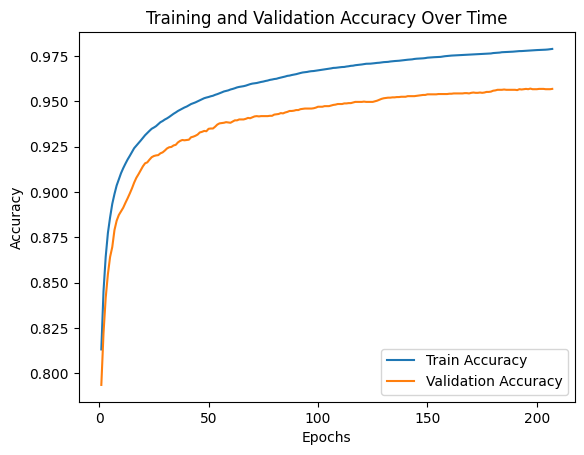

In [108]:
# Visualizing the accuracies
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.legend()
plt.show()

In [109]:
print(f'Best Model Accuracy on Validation set is: {np.round(best_val_acc * 100)}%')

Best Model Accuracy on Validation set is: 96.0%


**1. Testing on Remaining Test Set:**
- It loops through images not used for validation.
- For each image:
    - Gets a prediction from the best model.
    - Extracts predicted and true labels.
    - Stores them as pairs for later analysis.

**2. Calculating Accuracy:**
- Counts correct predictions using list comprehension.
- Divides correct by total to get accuracy.

**3. Printing Results:**
- Outputs number of correct predictions, total predictions, and accuracy percentage.



In [110]:
# Iterating over the rest of the test images that we didnt include in val_set
all_preds = []
for image in range(len(test_labels), len(test_labels_all)):
    test_image = test_images_all[image]
    test_label = test_labels_all[image]
    predicted_label = model_prediction(best_model, test_image)
    predicted_label = np.argmax(predicted_label)
    test_label = np.argmax(test_label)
    all_preds.append((predicted_label,test_label))

correct_predictions = sum(1 for pred, true_label in all_preds if pred == true_label)
accuracy = np.round(correct_predictions / len(all_preds) * 100, 2)

print(f'Correct predictions count is: {correct_predictions} out of {len(all_preds)}\nThe accuracy is: {accuracy}%')

Correct predictions count is: 3902 out of 4000
The accuracy is: 97.55%


In [111]:
# Predicting a random images
res = evaluate_accuracy_one_sample(best_model, test_images_all[6123], test_labels_all[6123])
res 


True

## Draft cells


In [112]:
np.random.seed(42)
weight = 2 * np.random.random((3,3)) - 0.1
vw = np.zeros_like(weight)
for i in range(2):
    vw = 0.9 * vw + 0.01 * weight
    print(weight)
    print()
    print(vw)
    print()
    weight -= vw
    print(weight)
    print('--------')

[[0.64908024 1.80142861 1.36398788]
 [1.09731697 0.21203728 0.21198904]
 [0.01616722 1.63235229 1.10223002]]

[[0.0064908  0.01801429 0.01363988]
 [0.01097317 0.00212037 0.00211989]
 [0.00016167 0.01632352 0.0110223 ]]

[[0.64258944 1.78341433 1.350348  ]
 [1.0863438  0.20991691 0.20986915]
 [0.01600555 1.61602877 1.09120772]]
--------
[[0.64258944 1.78341433 1.350348  ]
 [1.0863438  0.20991691 0.20986915]
 [0.01600555 1.61602877 1.09120772]]

[[0.01226762 0.034047   0.02577937]
 [0.02073929 0.0040075  0.00400659]
 [0.00030556 0.03085146 0.02083215]]

[[0.63032182 1.74936733 1.32456863]
 [1.06560451 0.2059094  0.20586256]
 [0.01569999 1.58517731 1.07037558]]
--------


In [113]:
# Simulating the error 
preds = model_prediction(model, test_images[0:16]) # 16x10
print(f'Actual Label of example 1:\n {test_labels[0:16][0]}')
print()
print(f'Prediction of the model of example 1:\n {preds[0]}')
print()
print(f'Subtraction of the predection and the actual label example 1:\n {(preds - test_labels[0:16])[0]}') # This is the pure error which is we are going to calculate the dervitive according to it
print('-------------------------')
print((test_labels[0:16]).shape)
print((preds.shape))

Actual Label of example 1:
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

Prediction of the model of example 1:
 [1.12111652e-07 1.32262769e-10 1.53502132e-04 2.75089388e-05
 2.89204912e-11 2.13627487e-04 8.81958724e-20 9.99332662e-01
 5.62007332e-07 1.62257677e-05]

Subtraction of the predection and the actual label example 1:
 [ 1.12111652e-07  1.32262769e-10  1.53502132e-04  2.75089388e-05
  2.89204912e-11  2.13627487e-04  8.81958724e-20 -6.67337926e-04
  5.62007332e-07  1.62257677e-05]
-------------------------
(16, 10)
(16, 10)


In [114]:
print(np.argmax(preds, axis=1))
print(np.argmax(test_labels[0:16], axis=1))
print(np.mean(np.argmax(preds, axis=1) == np.argmax(test_labels[0:16], axis=1)))
print(np.argmax(preds[0])) # taking a list and returning the index of the greatest number of this list

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5]
0.9375
7


In [115]:
print(0.0015 * 0.15)

0.000225


In [116]:
test = np.zeros((HIDDEN_LAYER_SIZE, 1))
test2 = test.reshape(1, -1)
test2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [117]:
print(np.sign(np.random.rand(5, 1)) * 0.01) # -1 if x < 0, 0 if x==0, 1 if x > 0

[[0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]]


In [118]:
h = np.array([[4.0, 7.0],
              [3.0, 1.0]])

delta = np.array([[7.0, 1.0],
                  [5.0, 2.0]])

w = np.array([[3.0, 5.0],
              [4.0, 6.0]])

## model['W2'] -= lr * (hidden_layer.T.dot(output_layer_delta)) + reg_lambda * model['W2']

left = h.dot(delta)

print(left) # hidden.dot(output_delta)

lambda_w = np.array([[0.03, 0.05],
                     [0.04, 0.06]]) # reg_lambda * w = 0.01 * w

print(left + lambda_w)
print(w)
w -= 0.001 * (left) + lambda_w
print(w)


[[63. 18.]
 [26.  5.]]
[[63.03 18.05]
 [26.04  5.06]]
[[3. 5.]
 [4. 6.]]
[[2.907 4.932]
 [3.934 5.935]]


In [119]:
#L2 Regularization
h = np.array([[4.0, 7.0],
             [3.0, 1.0]])

delta = np.array([[7.0, 1.0],
                 [5.0, 2.0]])

w = np.array([[3.0, 5.0],
             [4.0, 6.0]])

reg_lambda = 0.01  # Regularization parameter
learning_rate = 0.01

for _ in range(5):
   left = h.dot(delta)
   lambda_w = reg_lambda * w

   w -= learning_rate * (left + lambda_w)
   print(f"Iteration {_+1}:")
   print(f"w: {w}")


Iteration 1:
w: [[2.3697 4.8195]
 [3.7396 5.9494]]
Iteration 2:
w: [[1.73946303 4.63901805]
 [3.47922604 5.89880506]]
Iteration 3:
w: [[1.10928908 4.45855415]
 [3.21887812 5.84821518]]
Iteration 4:
w: [[0.47917815 4.27810829]
 [2.95855623 5.79763036]]
Iteration 5:
w: [[-0.15086976  4.09768048]
 [ 2.69826037  5.74705059]]


In [120]:
#L2 Regularization
h = np.array([[4.0, 7.0],
             [3.0, 1.0]])

delta = np.array([[7.0, 1.0],
                 [5.0, 2.0]])

w = np.array([[3.0, 5.0],
             [4.0, 6.0]])

reg_lambda = 0.01  # Regularization parameter
learning_rate = 0.01

for _ in range(5):
   left = h.dot(delta)
   lambda_w = reg_lambda * np.sign(w)

   w -= learning_rate * (left + lambda_w)
   print(f"Iteration {_+1}:")
   print(f"w: {w}")


Iteration 1:
w: [[2.3699 4.8199]
 [3.7399 5.9499]]
Iteration 2:
w: [[1.7398 4.6398]
 [3.4798 5.8998]]
Iteration 3:
w: [[1.1097 4.4597]
 [3.2197 5.8497]]
Iteration 4:
w: [[0.4796 4.2796]
 [2.9596 5.7996]]
Iteration 5:
w: [[-0.1505  4.0995]
 [ 2.6995  5.7495]]
